# Tema 4. Regresión y evaluación de algoritmos de regresión

### Acceder datos en google colab
Ejecuta esta celda **solo** si estas usando google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_log_error, r2_score

## Ejemplo 4.1 Predicción precio coste autos

Basado en el dataset de precios de automóviles
(https://www.kaggle.com/datasets/ngawangchoeda/car-price-dataset) utilizaremos este dataset para ilustrar los aspectos de un modelo de regresión.

### Analisis exploratorio y limpieza de los datos

Empezaremos examinando los datos y limpiando algunos de ellos

In [3]:
# cargar los datos
# cambia la ruta si no estas en colab
df = pd.read_csv('drive/MyDrive/Colab Notebooks/dataset-car-price.csv')

# veamos como se han cargado los datos
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# cuantos datos tenemos: el número de ejemplos (las filas) y las caracteríticas (el número de columnas)
df.shape # da (número de filas, número de columnas)

(205, 26)

In [5]:
# Miremos que columnas tenemos
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
# Nos interesa la marca del auto. Vemos que la variable CarName contiene la marca junto con el modelo. Procesemos esta cadena de caracteres
# para separarla en Marca - modelo. Creamos dos columnas nuevas: marca y modelo a partir de CarName
df['marca'] = df['CarName'].apply(lambda x : x.split()[0]) # dividimos por el espacio y tomamos el primer elemento
df['modelo'] = df['CarName'].apply(lambda x : " ".join(x.split()[1:])) # dividimos por el espacio y tomamos el resto excepto el primer elemento

# comprobamos que tal ha salido
df[['CarName','marca','modelo']].head()

,CarName,marca,modelo
0,alfa-romero giulia,alfa-romero,giulia
1,alfa-romero stelvio,alfa-romero,stelvio
2,alfa-romero Quadrifoglio,alfa-romero,Quadrifoglio
3,audi 100 ls,audi,100 ls
4,audi 100ls,audi,100ls


In [7]:
# Si miramos con atención detectamos algunos errores en los datos. Por ejemplo, en la línea 0 y 1, no es alfa-romero, sino alfa-romeo.
# Veamos si tenemos más cosas así:
df['marca'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
# Corrijamos este y otros errores.
df['marca'] = df['marca'].replace('alfa-romero', 'alfa-romeo')
df['marca'] = df['marca'].replace('maxda', 'mazda')
df['marca'] = df['marca'].replace('porcshce', 'porsche')
df['marca'] = df['marca'].replace('toyouta', 'toyota')
df['marca'] = df['marca'].replace('vokswagen', 'volkswagen')
df['marca'] = df['marca'].replace('vw', 'volkswagen')

# veamos cuantas marcas únicas tenemos ahora
df['marca'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Regresión

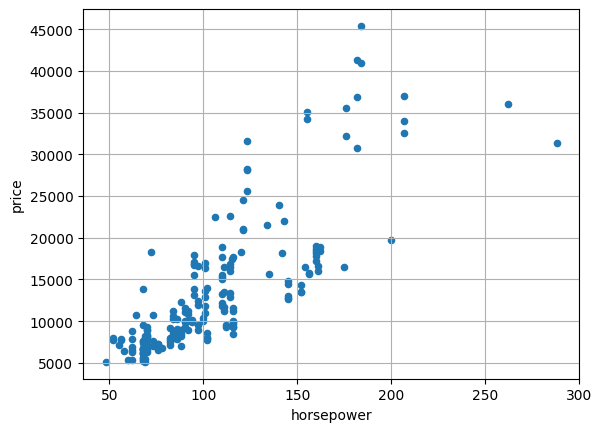

In [9]:
ax = df.plot.scatter('horsepower','price')
ax.grid()

## Ejemplo 4.2 Regresion lineal relación caballos de potencia / precios

Vamos a utilizar regresión lineal a la relación entre los caballos de potencia y los precios de los autos. Para ello vamos a usar la librería scikit-learn (https://scikit-learn.org/stable/).

Vamos para ello utilizar el *Ordinary Least Squares* https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

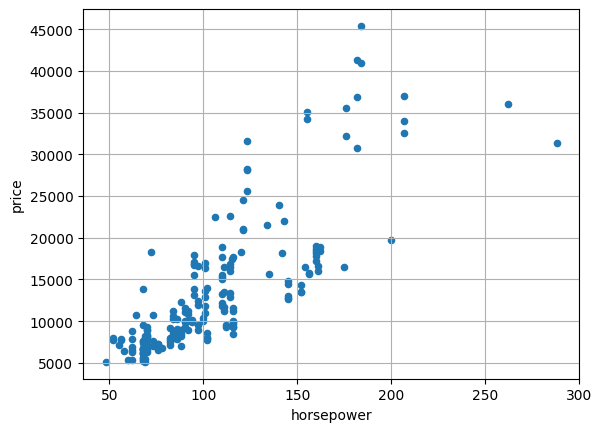

In [10]:
ax = df.plot.scatter('horsepower','price')
ax.grid()

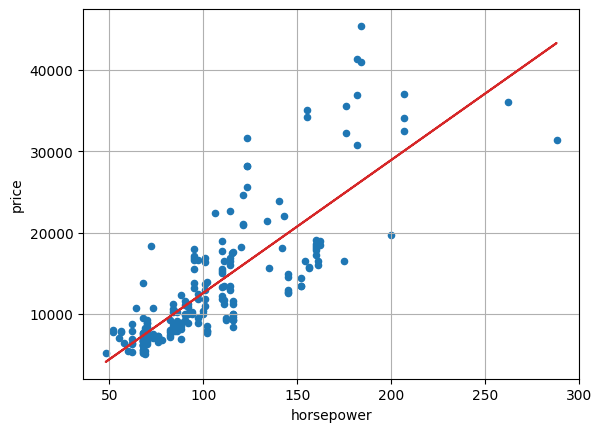

In [11]:
# creamos el objeto para el ajuste
reg = LinearRegression()

# ajuste a los puntos
X = df['horsepower'].values.reshape(-1,1)
y = df['price'].values
#print(X)

# realiza el ajuste
reg.fit(X,y)

# realiza predicciones en el rango de la variable
y_pred = reg.predict(X)

ax = df.plot.scatter('horsepower','price')
ax.plot(X, y_pred, '-', color='tab:red')
ax.grid()

## Ejemplo 4.3 Medidas desempeño

In [12]:
print(f"Error cuadrático medio: {mean_squared_error(y, y_pred):.3f}")
print(f"Raíz del error cuadrático medio: {root_mean_squared_error(y, y_pred):.3f}")
print(f"Error absoluto medio {mean_absolute_error(y, y_pred):.3f}")
print(f"Error porcentual absoluto medio {mean_absolute_percentage_error(y, y_pred):.3f}")
print(f"Logaritmo de la raíz del error cuadrático medio: {root_mean_squared_log_error(y, y_pred):.3f}")
print(f"Coeficiente de determinación: {r2_score(y, y_pred):.3f}")

Error cuadrático medio: 22032509.702
Raíz del error cuadrático medio: 4693.880
Error absoluto medio 3326.147
Error porcentual absoluto medio 0.238
Logaritmo de la raíz del error cuadrático medio: 0.278
Coeficiente de determinación: 0.653


## Ejemplo 4.4 Visualización de errores

### Diagrama de dispersión

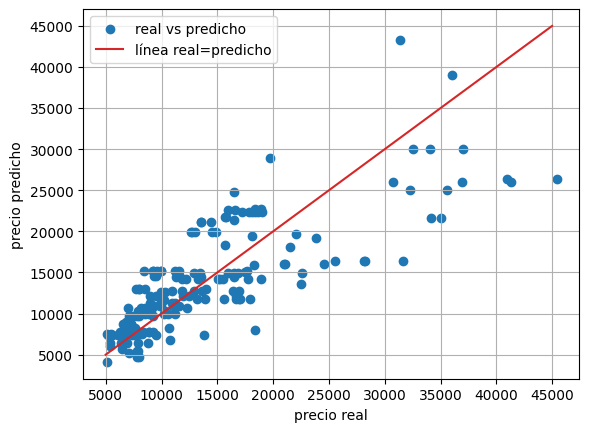

In [23]:
# Diagrama de dispersión de errores

fig, ax = plt.subplots(1,1)  # figura donde hacer el gráfico
ax.scatter(y, y_pred, label='real vs predicho') # real vs predicho
ax.set_xlabel("precio real")
ax.set_ylabel("precio predicho")

ax.plot(np.arange(5_000, 45_000), np.arange(5_000, 45_000), '-', color='tab:red', label='línea real=predicho')

ax.legend()
ax.grid()

### Histograma de los errores

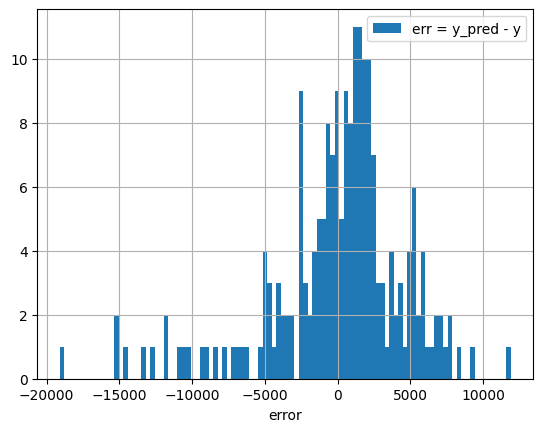

In [26]:
# cálculo de los errores
err = y_pred - y

# histograma
fig, ax = plt.subplots(1,1)  # figura donde hacer el gráfico
ax.hist(err, bins=100, label='err = y_pred - y') # real vs predicho
ax.set_xlabel("error")
ax.legend()
ax.grid()